In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# We want to use tricep skinfold measurments to predict BMI
# so the independent variable, X, or SkinThickness
# predicts the dependent variable, y, or BMI

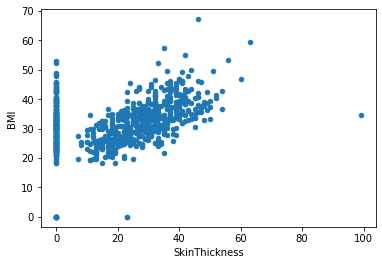

In [6]:
# Let's see if the data is linear
df.plot(kind = 'scatter', x='SkinThickness', y='BMI')
plt.show()

In [ ]:
#If I had done this again, I would have removed all the skin thickness rows that had 0 in them
#because it skewed the data

In [7]:
# Test train split for supervised training
X_train, X_test, y_train, y_test = train_test_split(df.SkinThickness, df.BMI)


In [8]:
#Create linear model and train it
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1, 1), y_train.values)

LinearRegression()

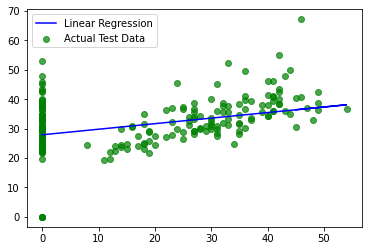

In [10]:
# Use model to predict on test data
prediction = LR.predict(X_test.values.reshape(-1, 1))

#Plot prediction ine against actual test data
plt.plot(X_test, prediction, label="Linear Regression", color='b')
plt.scatter(X_test, y_test, label="Actual Test Data", color='g', alpha=.7)
plt.legend()
plt.show()

In [20]:
#To see how the model will predict BMI if a specific skin thickness of 50
LR.predict(np.array([[50]]))[0]
#print("You will have a BMI of ", LR.predict(50)[0], "if your skin thickness is 50")

37.31369844964428

In [23]:
print("You will have a BMI of",LR.predict(np.array([[50]]))[0], "if your skin thickness is 50").

You will have a BMI of 37.31369844964428 if your skin thickness is 50


In [24]:
#Score the model which is R squared score
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.1520166022005771

In [ ]:
#The max score it can get is 1.0
# So this model is only 15% accurate! Boo.